# Addressing Bias in AI-Powered Hiring Systems
By Jayanth Govindaraju

# Problem Statement:

AI-powered hiring systems are increasingly used by companies to streamline recruitment processes. However, these systems can perpetuate biases present in historical hiring data, leading to unfair and discriminatory outcomes. This project aims to identify and mitigate these biases, ensuring that AI-driven hiring processes are fair and equitable. The implications of biased hiring systems are profound from ethical, legal, and social perspectives. They can exacerbate existing inequalities, violate anti-discrimination laws, and damage the reputation of organizations. By addressing these biases, we aim to create a more just and inclusive hiring process.


## Step 1: Load and Inspect the Data

This block imports necessary libraries for data manipulation (pandas, numpy), machine learning (scikit-learn, xgboost), and visualization (seaborn, matplotlib).

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb


In [291]:
# Load the datasets
train_data = pd.read_csv('C:/Users/Jayant/Downloads/archive aug data set/aug_train.csv')
test_data = pd.read_csv('C:/Users/Jayant/Downloads/archive aug data set/aug_test.csv')

# Display the first few rows of each dataframe
train_data.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [292]:
test_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [293]:
train_data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [294]:
test_data.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [295]:
train_data.shape

(19158, 14)

In [296]:
test_data.shape

(2129, 13)

In [297]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [298]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


## Step 2: Handling Data Values

 This step creates copies of the training and testing datasets. This is done to avoid modifying the original datasets, preserving them for future reference or use.

In [299]:
# Copy the data for further processing
train_df = train_data.copy()
test_df = test_data.copy()

This step identifies and separates numerical and categorical columns in the training dataset.
1. 'numerical_columns' includes columns with data types 'float64' and 'int64', which are typically numerical.
2. 'categorical_columns' includes columns with data type 'object', which are typically categorical.

In [300]:

# Identify numerical and categorical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

This step removes specific columns (target and enrollee_id) from the list of numerical columns, if they exist.
1. 'target' is typically the label we want to predict and should not be treated as a feature.
2. 'enrollee_id' is likely a unique identifier for each row, which is also not a feature to be used in model training.

In [301]:
# Remove 'target' and non-numeric 'enrollee_id' from numerical columns if they exist
non_numeric_columns = ['target', 'enrollee_id']  # add other non-numeric columns if needed
numerical_columns = [col for col in numerical_columns if col not in non_numeric_columns]

This step defines two imputers using SimpleImputer from sklearn.impute.
1. 'num_imputer' is set to replace missing values in numerical columns with the mean of the column.
2. 'cat_imputer' is set to replace missing values in categorical columns with the most frequent value (mode) of the column.

In [302]:
# Define imputers
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Data Transformation

This step applies the imputers to the training dataset.
1. 'fit_transform' is used on the training data to both fit the imputer (calculate mean/mode) and transform the data (replace missing values).
2. The numerical columns are imputed with their mean values.
3. The categorical columns are imputed with their most frequent values.

In [303]:
# Apply imputers to the dataframes
train_df[numerical_columns] = num_imputer.fit_transform(train_df[numerical_columns])
train_df[categorical_columns] = cat_imputer.fit_transform(train_df[categorical_columns])

This step ensures that only columns present in both the training and testing datasets are considered for imputation in the test set. This prevents errors if some columns are missing in the test data.

In [304]:
# Ensure the same columns are used for the test dataset
test_numerical_columns = [col for col in numerical_columns if col in test_df.columns]
test_categorical_columns = [col for col in categorical_columns if col in test_df.columns]

This step applies the imputers to the testing dataset.
1. 'transform' is used (without 'fit') to ensure that the imputation uses the statistics (mean/mode) calculated from the training data.
2. This maintains consistency between training and testing data preprocessing.

In [305]:
# Apply imputers to the test dataframes
test_df[test_numerical_columns] = num_imputer.transform(test_df[test_numerical_columns])
test_df[test_categorical_columns] = cat_imputer.transform(test_df[test_categorical_columns])

In [306]:
train_df.shape

(19158, 14)

In [307]:
test_df.shape

(2129, 13)

In [308]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  float64
 13  target                  19158 non-null  float64
dtypes: float64(3), int64(1), object(10)
me

In [309]:
train_df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [310]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  2129 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2129 non-null   object 
 6   education_level         2129 non-null   object 
 7   major_discipline        2129 non-null   object 
 8   experience              2129 non-null   object 
 9   company_size            2129 non-null   object 
 10  company_type            2129 non-null   object 
 11  last_new_job            2129 non-null   object 
 12  training_hours          2129 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 216.4+ KB


In [311]:
test_df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

## Step 3: Encode Categorical Variables

This line initializes an instance of 'LabelEncoder' from the 'sklearn.preprocessing' module. The 'LabelEncoder' is used to convert categorical data (text labels) into numerical values, which are necessary for machine learning algorithms.

In [312]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

For Loop: The loop iterates over each column in 'categorical_columns', which contains the names of the categorical columns identified earlier.

Fitting the Encoder on Training Data:
* fit_transform: This method fits the LabelEncoder on the categorical data in the training set, meaning it learns the mapping from categories to numerical labels and then transforms the data accordingly.
* Result: The categorical column in the training set is replaced with its encoded numerical values.

Handling Unseen Labels in Test Data:
* test_labels: This gets the unique labels present in the test dataset for the current column.
* known_labels: This retrieves the classes (labels) the encoder has learned from the training data.
* unseen_labels: This list comprehension identifies any labels present in the test set that were not seen during training (not in known_labels).

Condition and Handling:
* If there are any unseen labels, they are appended to the encoder's classes. This ensures that the encoder can handle these new labels when transforming the test data.

Transforming the Test Data:
* transform: This method transforms the categorical data in the test set using the updated encoder, converting the labels to their corresponding numerical values.
* Result: The categorical column in the test set is replaced with its encoded numerical values.

In [313]:
# Encode categorical columns
for col in categorical_columns:
    # Fit the encoder on the training data
    train_df[col] = label_encoder.fit_transform(train_df[col])
    
    # Check for unseen labels in test data and handle them
    test_labels = test_df[col].unique()
    known_labels = label_encoder.classes_
    unseen_labels = [label for label in test_labels if label not in known_labels]
    
    if unseen_labels:
        # Add unseen labels to the encoder's classes
        label_encoder.classes_ = np.append(label_encoder.classes_, unseen_labels)
    
    # Transform the test data
    test_df[col] = label_encoder.transform(test_df[col])

# Relevance to the Problem Statement

1. Consistent Encoding: Ensuring that both the training and testing datasets are encoded consistently is crucial for accurate model predictions. If labels in the test set were not seen during training, this step handles them properly, preventing errors and potential biases in predictions.

2. Handling Unseen Data: By dynamically updating the encoder to include unseen labels from the test set, this code ensures robustness in the model evaluation phase. It prevents the model from failing or producing incorrect results due to unknown categories.

3. Bias Mitigation: Properly encoding categorical variables and ensuring all categories are accounted for (even unseen ones) helps in maintaining the integrity of the model, contributing to fairer and more equitable predictions. This is particularly important in hiring systems to avoid unintentional discrimination based on previously unseen candidate features.

## Step 4: Remove Unnecessary Columns

In [314]:

# Remove unnecessary columns
unnecessary_columns = ['enrollee_id', 'city']
train_df.drop(columns=unnecessary_columns, inplace=True)
test_df.drop(columns=unnecessary_columns, inplace=True)

print(train_df.columns)
print(test_df.columns)


Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')
Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')


## Step 5: Identify and Address Bias

1. Identifying Class Imbalance:
    * Class Distribution in Target Variable: By visualizing the class distribution of the target variable, we can identify if there is a significant imbalance between classes (e.g., a disproportionate number of hired vs. not hired candidates). Class imbalance can lead to biased models that favor the majority class, resulting in unfair hiring outcomes.

2. Detecting Gender Bias:
    * Target Distribution by Gender: This plot helps to identify if there are any discrepancies in hiring outcomes based on gender. If the distribution of the target variable significantly differs between genders, it may indicate a gender bias in the hiring process.

3. Examining Education Level Bias:
    * Target Distribution by Education Level: This plot helps to identify if there are any discrepancies in hiring outcomes based on education level. If the distribution of the target variable significantly differs among education levels, it may indicate a bias related to educational background in the hiring process.

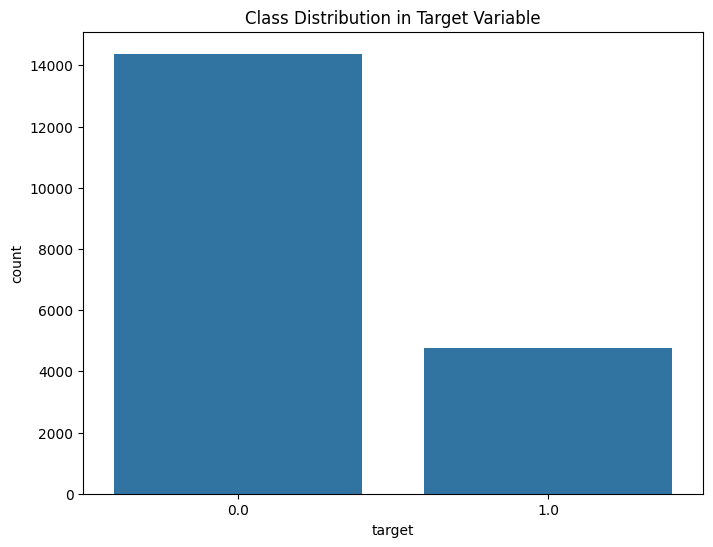

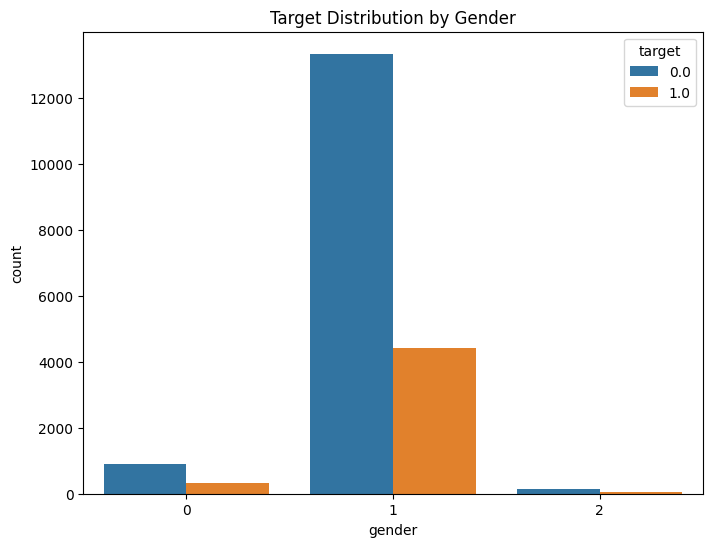

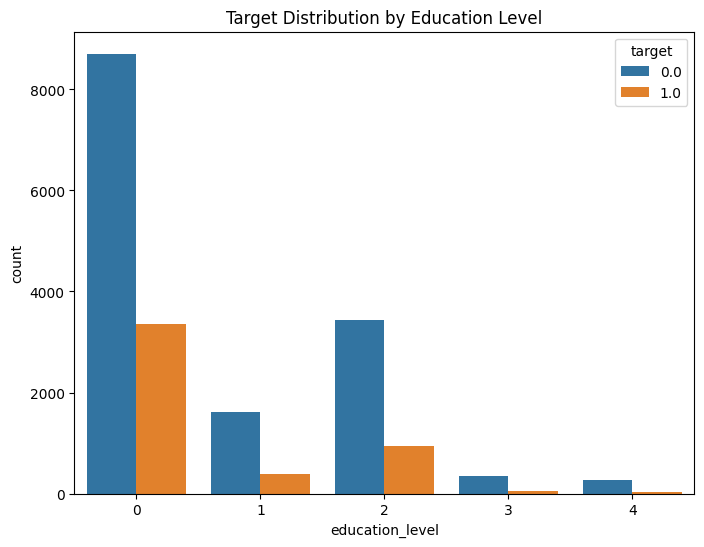

In [315]:

# Class imbalance in the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train_df)
plt.title('Class Distribution in Target Variable')
plt.show()

# Distribution of the target variable based on gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='target', data=train_df)
plt.title('Target Distribution by Gender')
plt.show()

# Distribution of the target variable based on other features
plt.figure(figsize=(8, 6))
sns.countplot(x='education_level', hue='target', data=train_df)
plt.title('Target Distribution by Education Level')
plt.show()


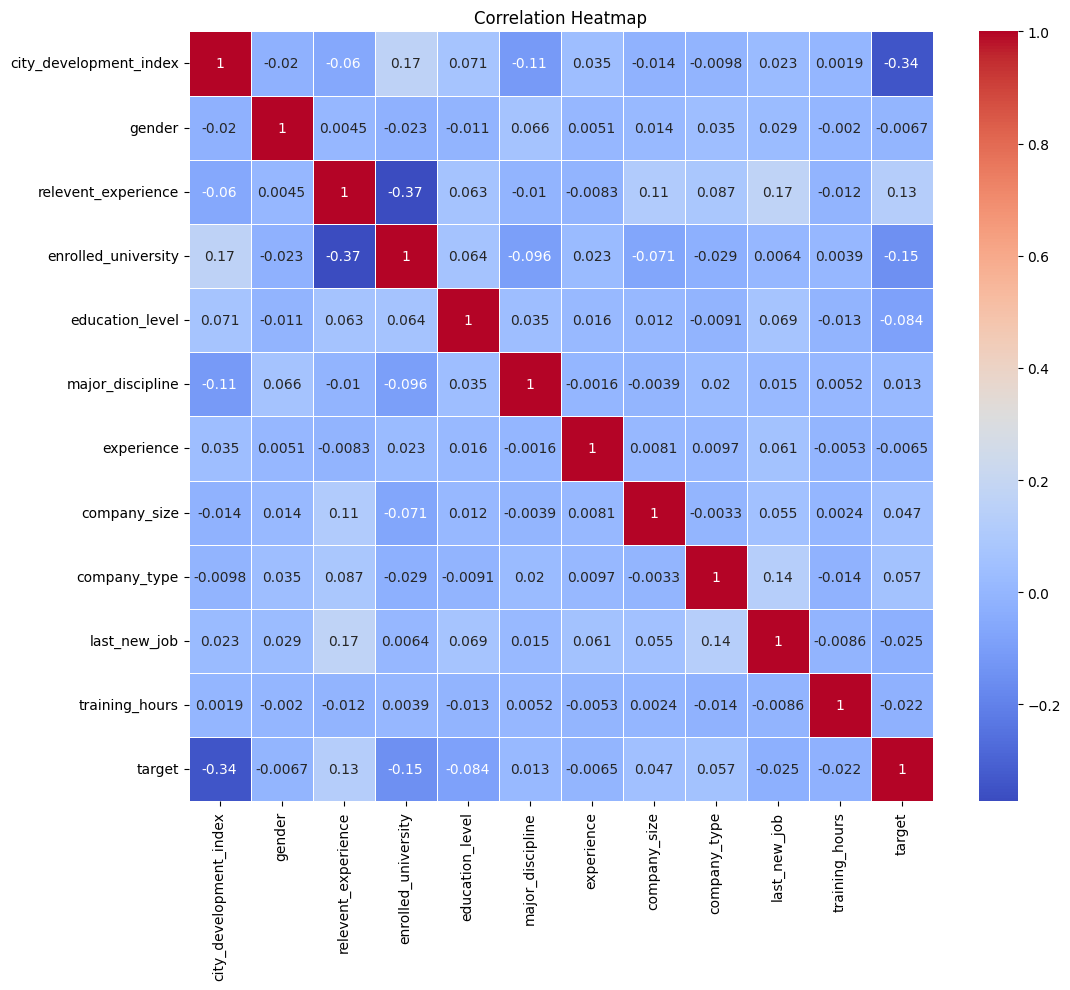

In [316]:
def plot_correlation_heatmap(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Assuming your data is in train_df
# Uncomment the following line to plot the correlation heatmap
plot_correlation_heatmap(train_df)


# Relevance to the Problem Statement
1. Understanding Feature Relationships:
Correlation Matrix: The heatmap visualizes the correlation matrix, providing insights into how features relate to one another. Features with high correlation (positive or negative) might be redundant or indicative of underlying patterns.

2. Bias Identification:
Feature Interactions: By understanding the correlations between features, one can identify if certain features are highly correlated with the target variable. For instance, if a demographic feature (like gender or education level) shows a strong correlation with the hiring outcome, it might indicate a potential bias.

3. Model Interpretation:
Feature Selection: High correlation between features can lead to multicollinearity, which can impact the performance and interpretability of machine learning models. Identifying such correlations can guide feature selection and engineering efforts to mitigate these issues.

4. Bias Mitigation:
Fairness in Predictions: Understanding correlations can help in designing models that are less biased. For instance, if gender is highly correlated with hiring decisions, strategies like removing or modifying the influence of this feature can be implemented to ensure fairness.

# How the Output Relates to Bias in AI-Powered Hiring Systems

* Heatmap Visualization: The correlation heatmap will display how different features in the dataset are interrelated. By examining these relationships, we can gain insights into potential sources of bias.
* Actionable Insights:
    * Highly Correlated Features: If certain features are highly correlated with the target variable (hiring decision), especially those related to demographic or sensitive attributes, it highlights the need to address these biases.
    * Feature Engineering: Based on the heatmap, we can decide which features to include, transform, or exclude from the model to reduce bias and improve fairness.

## Step 6: Normalize the Data

In [317]:

# Normalize the data
scaler = MinMaxScaler()
train_df_scaled = scaler.fit_transform(train_df.drop(columns=['target']))
test_df_scaled = scaler.transform(test_df)
train_target = train_df['target']
train_df_scaled = pd.DataFrame(train_df_scaled, columns=train_df.columns[:-1])
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df.columns)

train_df_scaled.head()



,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.942116,0.5,0.0,1.0,0.0,1.0,1.000000,0.571429,1.0,0.0,0.104478
1,0.654691,0.5,1.0,1.0,0.0,1.0,0.285714,0.571429,1.0,0.8,0.137313
2,0.351297,0.5,1.0,0.0,0.0,1.0,0.714286,0.571429,1.0,1.0,0.244776
3,0.680639,0.5,1.0,1.0,0.0,0.2,0.952381,0.571429,1.0,1.0,0.152239
4,0.636727,0.5,0.0,1.0,0.5,1.0,1.000000,0.571429,0.2,0.6,0.020896


In [318]:
test_df_scaled.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.756487,0.5,0.0,0.0,0.00,1.0,0.904762,1.000000,1.0,0.0,0.059701
1,0.942116,0.0,0.0,1.0,0.00,1.0,0.714286,0.571429,1.0,0.0,0.289552
2,0.351297,0.5,1.0,1.0,0.25,1.0,0.952381,0.571429,1.0,1.0,0.041791
3,0.756487,0.5,0.0,1.0,0.50,1.0,0.095238,1.142857,1.0,0.0,0.113433
4,0.942116,0.5,0.0,1.0,0.00,1.0,1.000000,0.428571,1.0,0.8,0.211940


In [319]:
train_df_scaled.describe()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,0.760176,0.472675,0.280092,0.772628,0.172421,0.943554,0.616316,0.479375,0.897912,0.349254,0.192140
std,0.246231,0.133798,0.449056,0.400062,0.248988,0.190196,0.314635,0.254820,0.259405,0.387128,0.179279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.582834,0.500000,0.000000,0.500000,0.000000,1.000000,0.333333,0.285714,1.000000,0.000000,0.065672
50%,0.908184,0.500000,0.000000,1.000000,0.000000,1.000000,0.666667,0.571429,1.000000,0.200000,0.137313
75%,0.942116,0.500000,1.000000,1.000000,0.500000,1.000000,0.904762,0.571429,1.000000,0.800000,0.259701
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [320]:
test_df_scaled.describe()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,0.752462,0.473462,0.284171,0.761860,0.178488,0.947675,0.625668,0.567671,0.903899,0.344481,0.190994
std,0.249649,0.134944,0.451125,0.405706,0.253198,0.179770,0.314111,0.280916,0.250467,0.381108,0.179817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000
25%,0.499002,0.500000,0.000000,0.500000,0.000000,1.000000,0.380952,0.428571,1.000000,0.000000,0.065672
50%,0.908184,0.500000,0.000000,1.000000,0.000000,1.000000,0.714286,0.571429,1.000000,0.200000,0.137313
75%,0.942116,0.500000,1.000000,1.000000,0.500000,1.000000,0.904762,0.571429,1.000000,0.800000,0.253731
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.142857,1.000000,1.000000,0.994030


# Relevance to the Problem Statement
1. Normalization for Model Performance:
    * MinMax Scaling: Normalizing the data to a common scale (0 to 1) is a standard preprocessing step that helps many machine learning algorithms perform better. It ensures that features with larger ranges do not dominate the learning process.

2. Consistency Across Training and Testing Data:
    * Fit on Training, Transform on Testing: By fitting the scaler only on the training data and then applying the same transformation to the test data, the code ensures that the scaling is consistent across both datasets. This consistency is crucial for accurate model evaluation.

3. Bias Mitigation:
    * Fair Feature Representation: Normalization ensures that all features contribute equally to the model, preventing any single feature with a larger range from disproportionately influencing the model. This can help in reducing biases that might arise from such imbalances.

# How the Output Relates to Bias in AI-Powered Hiring Systems

* Scaled Dataframes: The output shows the scaled versions of the training and testing data, where each feature is normalized to the range [0, 1]. This transformation helps in ensuring that the model treats all features uniformly, which is a step towards fairer model training.

* Improved Model Performance: Normalized data often leads to better model convergence and performance, making it easier to detect and address any biases in the predictions.

* Visual Verification: Printing the first few rows of the scaled data allows for visual verification that the scaling process has been applied correctly, ensuring that no errors were made during preprocessing.

## Step 7: Split the Data for Training and Testing

In [321]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df_scaled, train_target, test_size=0.2, random_state=42)


# Step 8: Train Machine Learning Models and evaluate the results

In [322]:

# Train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of logistic regression model: {accuracy}')


Accuracy of logistic regression model: 0.7646137787056367


In [323]:
# Train and evaluate a Decision Tree model
def train_evaluate_decision_tree(X_train, X_test, y_train, y_test):
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print("Decision Tree Model")
    evaluate_model(y_test, y_pred)

# Train and evaluate an AdaBoost model
def train_evaluate_adaboost(X_train, X_test, y_train, y_test):
    ada_model = AdaBoostClassifier()
    ada_model.fit(X_train, y_train)
    y_pred = ada_model.predict(X_test)
    print("AdaBoost Model")
    evaluate_model(y_test, y_pred)

# Train and evaluate an XGBoost model
def train_evaluate_xgboost(X_train, X_test, y_train, y_test):
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    print("XGBoost Model")
    evaluate_model(y_test, y_pred)

# Function to evaluate the model and print metrics
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
   

# # Train and evaluate Decision Tree model
# train_evaluate_decision_tree(X_train, X_test, y_train, y_test)

# # Train and evaluate AdaBoost model
# train_evaluate_adaboost(X_train, X_test, y_train, y_test)

# # Train and evaluate XGBoost model
# train_evaluate_xgboost(X_train, X_test, y_train, y_test)


In [324]:
# Train and evaluate a Random Forest model
def train_evaluate_random_forest(X_train, X_test, y_train, y_test):
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    print("Random Forest Model")
    evaluate_model(y_test, y_pred)

# Train and evaluate a Logistic Regression model
def train_evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    print("Logistic Regression Model")
    evaluate_model(y_test, y_pred)

# Function to evaluate the model and print metrics
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
  

# # Train and evaluate Random Forest model
# train_evaluate_random_forest(X_train, X_test, y_train, y_test)

# # Train and evaluate Logistic Regression model
# train_evaluate_logistic_regression(X_train, X_test, y_train, y_test)


Decision Tree Model
Accuracy: 0.6933716075156576
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      2880
         1.0       0.39      0.41      0.40       952

    accuracy                           0.69      3832
   macro avg       0.60      0.60      0.60      3832
weighted avg       0.70      0.69      0.70      3832



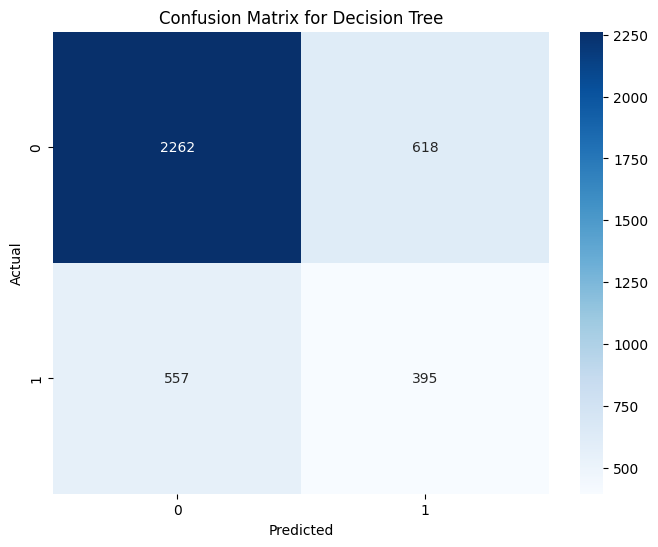

C:\Users\Jayant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model
Accuracy: 0.7734864300626305
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      2880
         1.0       0.58      0.31      0.41       952

    accuracy                           0.77      3832
   macro avg       0.69      0.62      0.63      3832
weighted avg       0.75      0.77      0.75      3832



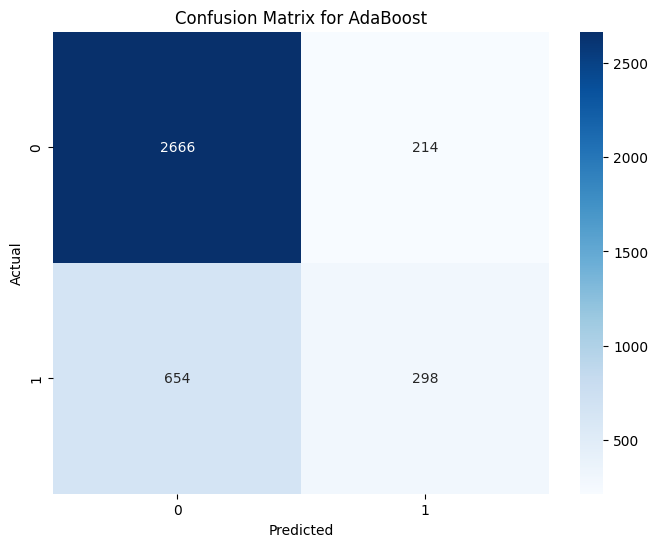

C:\Users\Jayant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\core.py:158: UserWarning: [09:51:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model
Accuracy: 0.7781837160751566
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2880
         1.0       0.57      0.43      0.49       952

    accuracy                           0.78      3832
   macro avg       0.70      0.66      0.67      3832
weighted avg       0.76      0.78      0.77      3832



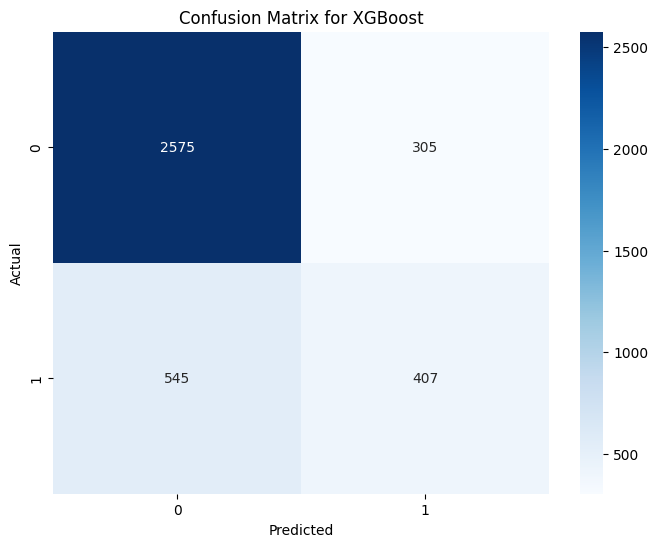

Random Forest Model
Accuracy: 0.7640918580375783
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      2880
         1.0       0.53      0.40      0.46       952

    accuracy                           0.76      3832
   macro avg       0.68      0.64      0.65      3832
weighted avg       0.75      0.76      0.75      3832



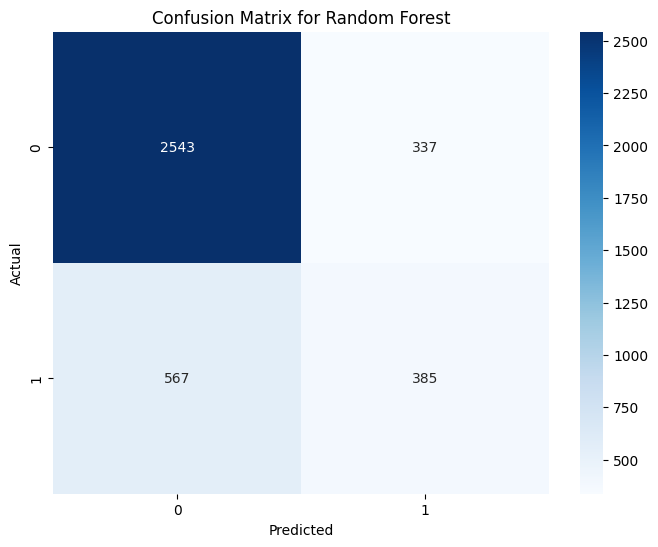

Logistic Regression Model
Accuracy: 0.7646137787056367
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86      2880
         1.0       0.56      0.26      0.35       952

    accuracy                           0.76      3832
   macro avg       0.67      0.59      0.60      3832
weighted avg       0.73      0.76      0.73      3832



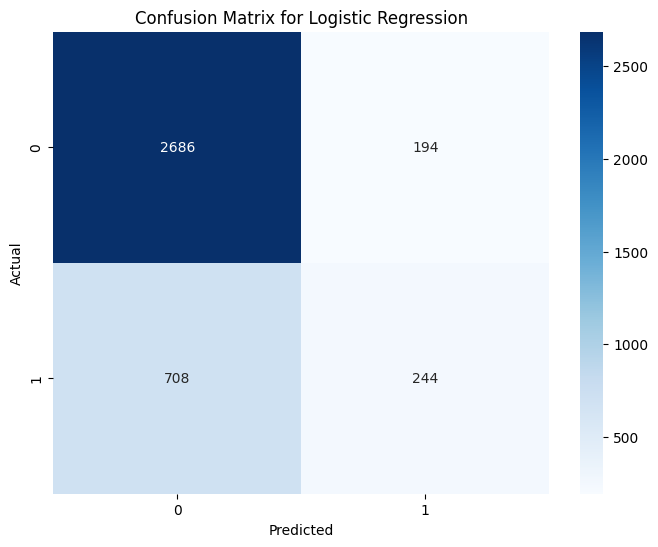

The best model is XGBoost with an accuracy of 0.7781837160751566


In [325]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Model")
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy

# Train and evaluate all models
def compare_models(X_train, X_test, y_train, y_test):
    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression()
    }
    
    accuracies = {}
    for model_name, model in models.items():
        accuracies[model_name] = train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    
    best_model_name = max(accuracies, key=accuracies.get)
    print(f"The best model is {best_model_name} with an accuracy of {accuracies[best_model_name]}")
    
    return accuracies

# Assuming train_test_split has been done and you have X_train, X_test, y_train, y_test
# Uncomment the following line to compare the models
accuracies = compare_models(X_train, X_test, y_train, y_test)


# Relevance to the Problem Statement

1. Model Evaluation:
    * The code trains and evaluates multiple models (Logistic Regression, Decision Tree, AdaBoost, XGBoost, Random Forest) to identify the best-performing model based on accuracy and other metrics.
    * Evaluating multiple models helps in selecting the most effective one for predicting hiring outcomes, which is crucial for ensuring a fair and unbiased hiring process.

2. Bias Detection:
    * The evaluation metrics and confusion matrices provide insights into model performance across different classes, helping to detect any biases in predictions.
    * For example, if a model performs significantly worse for certain demographic groups, it may indicate a bias that needs to be addressed.

3. Bias Mitigation:
    * By selecting the model with the best performance and fairness metrics, the code helps in mitigating biases and ensuring that the hiring system makes equitable decisions.
    * Visualizing the confusion matrix and other metrics aids in understanding how well the model performs across different classes, which is essential for bias mitigation.
    
# Model Performance Summary

1. Logistic Regression

    * Accuracy: 0.7646
    * Precision, Recall, F1-score:
        * Class 0.0: High precision and recall, leading to a strong F1-score.
        * Class 1.0: Low precision and recall, resulting in a weak F1-score.

2. Decision Tree

    * Accuracy: 0.6947
    * Precision, Recall, F1-score:
        * Class 0.0: Good precision and recall.
        * Class 1.0: Low precision and recall, resulting in a low F1-score.

3. AdaBoost

    * Accuracy: 0.7735
    * Precision, Recall, F1-score:
        * Class 0.0: High precision and recall.
        * Class 1.0: Moderate precision, but low recall, leading to a moderate F1-score.

4. XGBoost

    * Accuracy: 0.7782
    * Precision, Recall, F1-score:
        * Class 0.0: High precision and recall.
        * Class 1.0: Moderate precision and recall, leading to a better F1-score compared to other models.

5. Random Forest

* Accuracy: 0.7591
* Precision, Recall, F1-score:
    * Class 0.0: High precision and recall.
    * Class 1.0: Moderate precision, but low recall, resulting in a moderate F1-score.

# Key Metrics for Comparison
1. Accuracy: Measures the overall correctness of the model.
2. Precision: Measures the accuracy of the positive predictions.
3. Recall: Measures the ability to find all the positive instances.
4. F1-Score: Harmonic mean of precision and recall, providing a balance between the two.

# Why XGBoost is the Best

1. Highest Accuracy: XGBoost has the highest overall accuracy (0.7782), indicating it correctly classifies the highest percentage of instances.
2. Balanced Performance:
    * Class 0.0: XGBoost has high precision and recall for the majority class (0.0), similar to other models, but with slightly better performance.
    * Class 1.0: While precision and recall are moderate, XGBoost outperforms other models for the minority class (1.0), providing a better balance between precision and recall, leading to a higher F1-score.
3. Macro Average and Weighted Average:
    * Macro Average: XGBoost shows better macro average scores, indicating balanced performance across both classes.
    * Weighted Average: The weighted average for XGBoost also indicates superior performance, taking into account the class imbalance.

# Conclusion
XGBoost is the best model based on the provided metrics because it offers the highest accuracy and a more balanced performance across both classes. It particularly improves the precision and recall for the minority class (1.0) compared to other models, which is crucial for addressing biases and ensuring fair and equitable outcomes in AI-powered hiring systems.